# **Análise de engajamento dos alunos.**
**Este notebook tem como objetivo demonstrar a quantidade de cliques em cada função da disicplina 4300459.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go  
import scipy.stats as stats

In [23]:
notas = pd.read_table('data/nonpublic/grades-4300459-2020.csv', sep=',')
notas.sample(0)

,userid,nota


In [3]:
tabela = pd.read_table('data/nonpublic/logs-4300459-2021.csv', sep=',')
tabela.sample(0)

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,...,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid


In [4]:
N=10000
alunos = tabela.query("userid != 2 & userid != -1 & userid !=6")

**Alunos que mais submeteram o quiz.**

In [5]:
quiz = alunos.query("component == 'mod_quiz'")
quiz_envios = quiz.query("action == 'submitted'")
quiz_envios_por_userid = quiz_envios.groupby('userid')['id'].count()
quiz_envios_por_userid[:5]

userid
1170    2
2471    1
3021    4
3596    6
4928    2
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

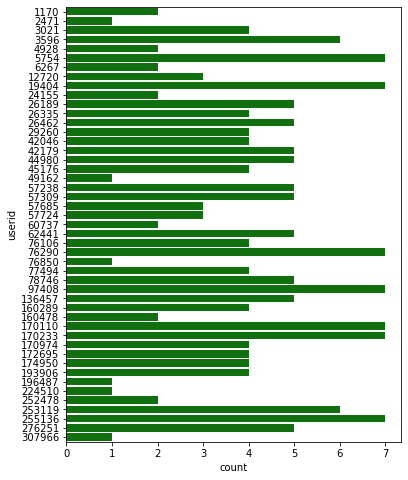

In [6]:
quizes = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=quiz_envios, color="g")

**Alunos que mais mandaram mensagens no chat.**

In [7]:
forum = alunos.query("component == 'mod_forum'")
forum['action'].value_counts()

viewed      3142
created      418
uploaded     371
deleted       60
updated       40
Name: action, dtype: int64

In [8]:
forum_envios = forum.query("action == 'created'")
forum_envios_por_userid = forum_envios.groupby('userid')['id'].count()
forum_envios_por_userid[:5]

userid
1170      5
3021      7
3596      6
5754     13
12720     2
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

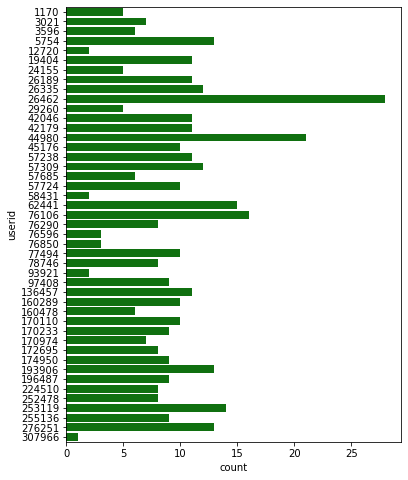

In [9]:
msgforum = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=forum_envios, color="g")

In [10]:
assign = alunos.query("component == 'mod_assign'")
assign['action'].value_counts()

viewed       2495
submitted     135
accepted       39
updated         1
Name: action, dtype: int64

In [11]:
assign_visual = assign.query("action == 'viewed'")
assign_visual_por_userid = assign_visual.groupby('userid')['id'].count()
assign_visual_por_userid[:5]

userid
3021     29
3596     29
5754     19
12720     4
19404    87
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

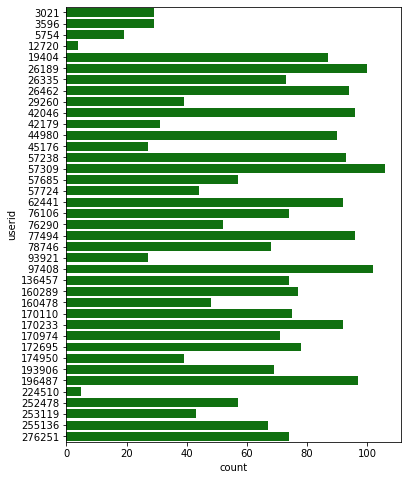

In [12]:
assign_viewed = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=assign_visual, color="g")

In [13]:
assign_submitted = assign.query("action == 'submitted'")
assign_submitted_por_userid = assign_submitted.groupby('userid')['id'].count()
assign_submitted_por_userid[:5]

userid
3021     2
3596     1
5754     1
19404    4
26189    5
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

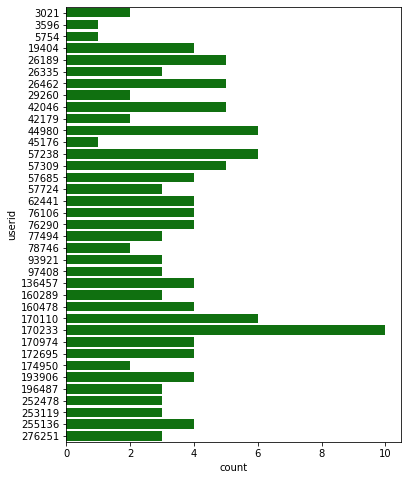

In [14]:
assign_submetido = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=assign_submitted, color="g")

In [15]:
indicadores = pd.concat([quiz_envios_por_userid,forum_envios_por_userid,assign_visual_por_userid,assign_submitted_por_userid],axis = 1)
indicadores = indicadores.fillna(0)
indicadores.columns = ['Fez_quiz','Enviou_forum','Viu_tarefa','Enviou_tarefa']
indicadores[:5]

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa
userid,,,,
1170,2.0,5.0,0.0,0.0
2471,1.0,0.0,0.0,0.0
3021,4.0,7.0,29.0,2.0
3596,6.0,6.0,29.0,1.0
4928,2.0,0.0,0.0,0.0


In [16]:
indicadores['Fez_quiz_z'] = stats.zscore(indicadores['Fez_quiz'],ddof=1)
indicadores['Enviou_forum_z'] = stats.zscore(indicadores['Enviou_forum'],ddof=1)
indicadores['Viu_tarefa_z'] = stats.zscore(indicadores['Viu_tarefa'],ddof=1)
indicadores['Enviou_tarefa_z'] = stats.zscore(indicadores['Enviou_tarefa'],ddof=1)
indicadores[:5]

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z
userid,,,,,,,,
1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511
2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511
3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355
3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433
4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511


In [17]:
indicadores['Engajamento'] = (indicadores['Fez_quiz_z'] + 
                              indicadores['Enviou_forum_z'] + 
                              indicadores['Viu_tarefa_z'] + 
                              indicadores['Enviou_tarefa_z'])/4
indicadores[:5]

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento
userid,,,,,,,,,
1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511,-1.014826
2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511,-1.363833
3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355,-0.255747
3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433,-0.175348
4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393


**Correlacionando os indicadores.**

In [18]:
indicadores.corr()

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento
Fez_quiz,1.000000,0.595644,0.619947,0.615656,1.000000,0.595644,0.619947,0.615656,0.816310
Enviou_forum,0.595644,1.000000,0.708481,0.622555,0.595644,1.000000,0.708481,0.622555,0.843825
Viu_tarefa,0.619947,0.708481,1.000000,0.852438,0.619947,0.708481,1.000000,0.852438,0.917112
Enviou_tarefa,0.615656,0.622555,0.852438,1.000000,0.615656,0.622555,0.852438,1.000000,0.891101
Fez_quiz_z,1.000000,0.595644,0.619947,0.615656,1.000000,0.595644,0.619947,0.615656,0.816310
Enviou_forum_z,0.595644,1.000000,0.708481,0.622555,0.595644,1.000000,0.708481,0.622555,0.843825
Viu_tarefa_z,0.619947,0.708481,1.000000,0.852438,0.619947,0.708481,1.000000,0.852438,0.917112
Enviou_tarefa_z,0.615656,0.622555,0.852438,1.000000,0.615656,0.622555,0.852438,1.000000,0.891101
Engajamento,0.816310,0.843825,0.917112,0.891101,0.816310,0.843825,0.917112,0.891101,1.000000


**Histograma do engajamento dos alunos na disiciplina.**

<AxesSubplot:xlabel='Engajamento', ylabel='Count'>

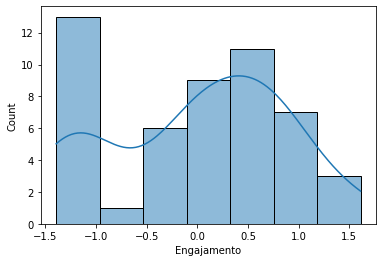

In [19]:
sns.histplot(data=indicadores, x="Engajamento", kde=True)

In [35]:
indicadores_nota = pd.merge(indicadores, notas, how = 'inner', on = 'userid')
indicadores_nota[:5]

,userid,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento,nota
0,1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511,-1.014826,0.73043
1,2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511,-1.363833,0.26087
2,3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355,-0.255747,5.00000
3,3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433,-0.175348,5.45536
4,4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393,0.41739


**Alunos que reprovaram.** 

Text(0, 0.5, 'Fez_quiz')

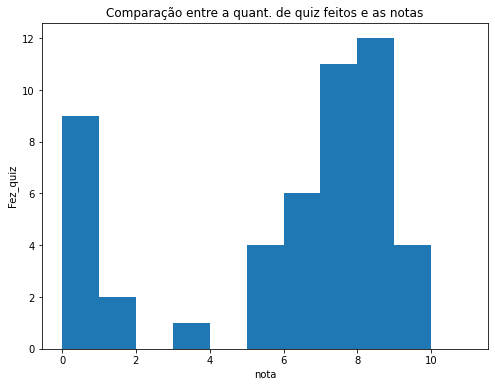

In [41]:
data = indicadores_nota['nota']
plt.figure(figsize=(8, 6))
plt.hist(data, bins=range(0, 12,1))
plt.title('Comparação entre a quant. de quiz feitos e as notas')
plt.xlabel('nota')
plt.ylabel('Fez_quiz')

**Possiveis alunos desistentes**

In [21]:
#mais indicadores atribuir peso aos indicadores
#criar visualisações através do corr
#regresões lineares
#grades-4300459-2020.csv